In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('drug200.csv')
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

In [ ]:
df

In [10]:

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Na_to_K']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
df

In [11]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Drug', axis=1)
y = df['Drug']

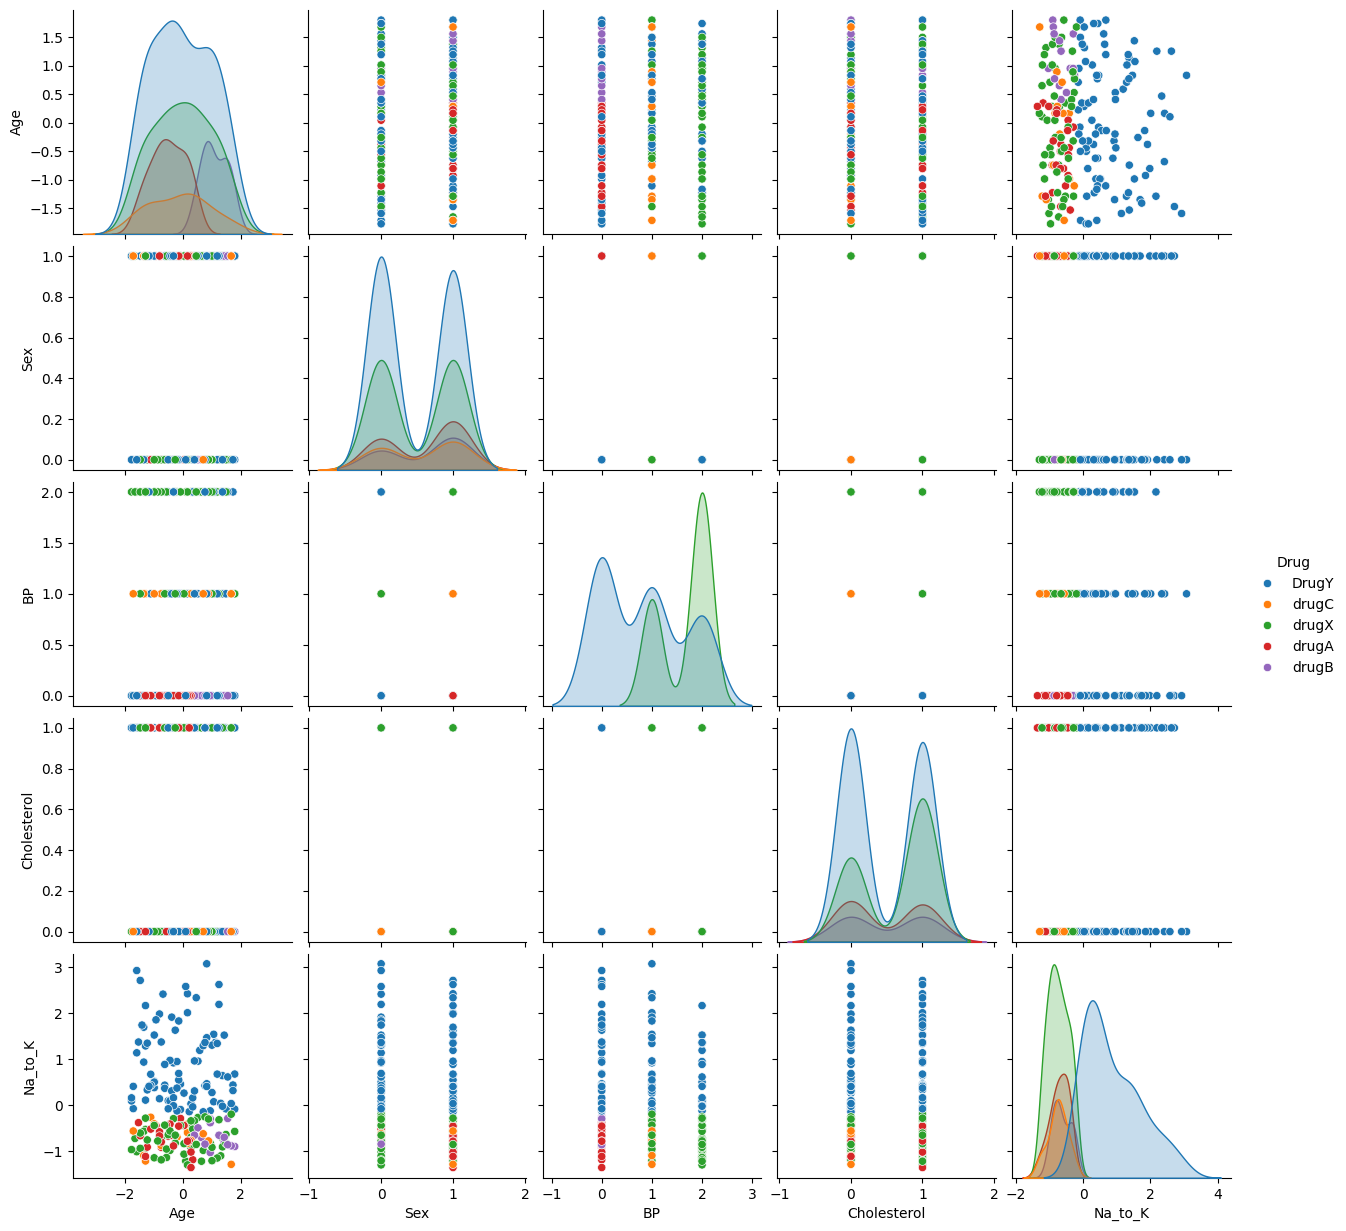

In [12]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt
# Pairplot for visualization
sns.pairplot(df, hue='Drug', diag_kind='kde')
plt.show()

In [13]:
# Decision Tree Model
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
clf=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,  random_state=None,
            splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

y_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


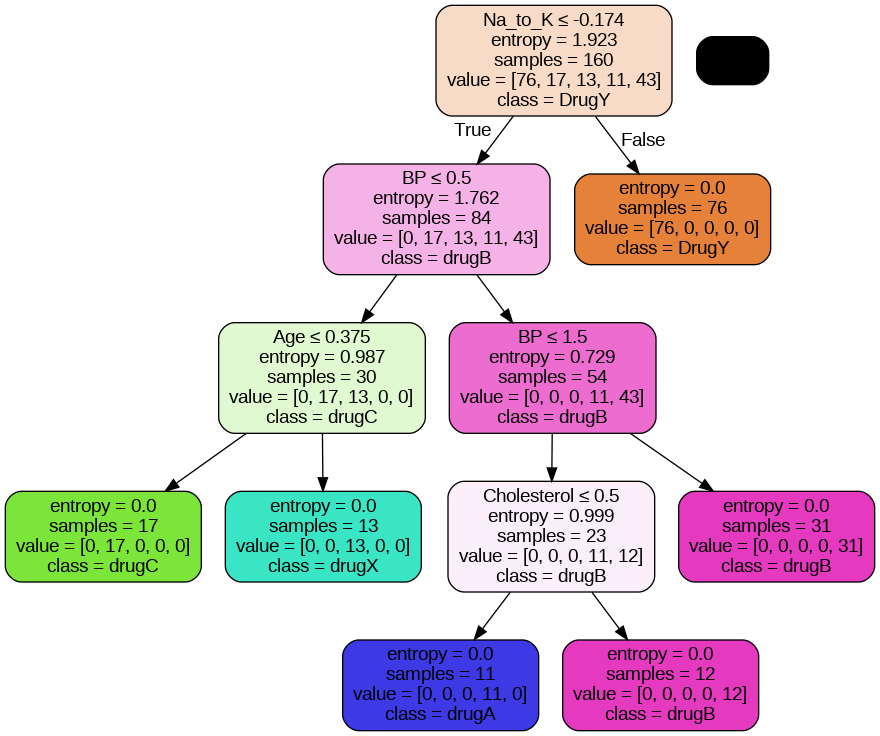

In [19]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Export the decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the DOT file to a PNG image
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

# Display the PNG image
Image(graph.create_png())


In [18]:
pip install pydotplus
